In [ ]:
# import Library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-18 00:30:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.87MB/s    in 53s     

2021-07-18 00:31:31 (5.85 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'


In [ ]:
os.listdir(base_dir)

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(90, 150),
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(90, 150),
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Latih model dengan model.fit
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(90, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                              
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=18,
    validation_data=validation_generator,
    validation_steps=4,
    verbose = 2)

Epoch 1/18
20/20 - 36s - loss: 0.6258 - accuracy: 0.4437 - val_loss: 0.5494 - val_accuracy: 0.5391
Epoch 2/18
20/20 - 4s - loss: 0.4343 - accuracy: 0.7312 - val_loss: 0.4830 - val_accuracy: 0.5859
Epoch 3/18
20/20 - 4s - loss: 0.3702 - accuracy: 0.7705 - val_loss: 0.2709 - val_accuracy: 0.8594
Epoch 4/18
20/20 - 4s - loss: 0.2515 - accuracy: 0.8754 - val_loss: 0.2815 - val_accuracy: 0.8203
Epoch 5/18
20/20 - 4s - loss: 0.2100 - accuracy: 0.8902 - val_loss: 0.1800 - val_accuracy: 0.9062
Epoch 6/18
20/20 - 4s - loss: 0.1474 - accuracy: 0.9312 - val_loss: 0.1911 - val_accuracy: 0.8906
Epoch 7/18
20/20 - 4s - loss: 0.1392 - accuracy: 0.9266 - val_loss: 0.1115 - val_accuracy: 0.9531
Epoch 8/18
20/20 - 4s - loss: 0.0915 - accuracy: 0.9557 - val_loss: 0.1144 - val_accuracy: 0.9453
Epoch 9/18
20/20 - 4s - loss: 0.1318 - accuracy: 0.9297 - val_loss: 0.1100 - val_accuracy: 0.9688
Epoch 10/18
20/20 - 4s - loss: 0.1020 - accuracy: 0.9492 - val_loss: 0.0930 - val_accuracy: 0.9531
Epoch 11/18
20/20 

In [ ]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving Batu.jpeg to Batu.jpeg
Batu.jpeg
rock


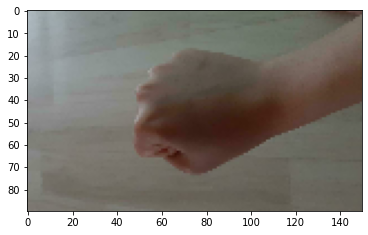

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(90,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('rock')
  elif classes[0][1]==1:
    print('paper')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('none')